In [141]:
import zipfile
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("Training.csv.zip")
zip_ref.extractall()
zip_ref.close()

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import random

In [143]:
train_data = pd.read_csv('Training.csv')
test_data = pd.read_csv("Testing.csv")

In [144]:
train_data.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [145]:
test_data.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD


In [146]:
column_list = train_data.columns.tolist()

In [147]:
train_prognosis = train_data['prognosis'].tolist()
test_prognosis = test_data['prognosis'].tolist()

In [148]:
set(column_list)

{'abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic _patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'fluid_overload.1',
 'foul_smell_of urine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itch

In [149]:
set(train_prognosis)

{'(vertigo) Paroymsal  Positional Vertigo',
 'AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Chronic cholestasis',
 'Common Cold',
 'Dengue',
 'Diabetes ',
 'Dimorphic hemmorhoids(piles)',
 'Drug Reaction',
 'Fungal infection',
 'GERD',
 'Gastroenteritis',
 'Heart attack',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension ',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthristis',
 'Paralysis (brain hemorrhage)',
 'Peptic ulcer diseae',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary tract infection',
 'Varicose veins',
 'hepatitis A'}

In [150]:
# Random data sample
train_data.sample(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
2957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
4135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Arthritis


In [151]:
print("train_data shape = ", train_data.shape)
print("test_data shape = ", test_data.shape)

train_data shape =  (4920, 133)
test_data shape =  (41, 133)


In [152]:
dataset = pd.read_csv('health_dataset.csv')
print("Dataset = ", dataset.shape)

Dataset =  (4961, 140)


In [153]:
dataset.sample(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,red_sore_around_nose,yellow_crust_ooze,allergic_lifestyle,unhealthy_eating_habits,poor_nutrition,insufficient_sleep,less_frequent_physical_exercise,highly_frequent_physical_exercise,stressful_lifestyle,prognosis
2626,0,0,0,0,0,0,0,1,1,1,...,0,0,1,1,0,0,0,0,0,GERD
1035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,Hepatitis C
2392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Osteoarthristis


In [154]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4961 entries, 0 to 4960
Columns: 140 entries, itching to prognosis
dtypes: int64(139), object(1)
memory usage: 5.3+ MB


Text(0.5, 1.0, 'Boxplot of Skin Rash by Itching')

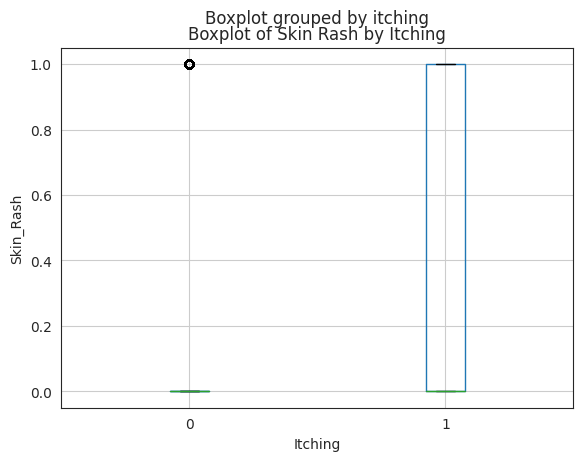

In [155]:
dataset.boxplot(column = "skin_rash", by="itching")
plt.xlabel("Itching")
plt.ylabel("Skin_Rash")
plt.title("Boxplot of Skin Rash by Itching")

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

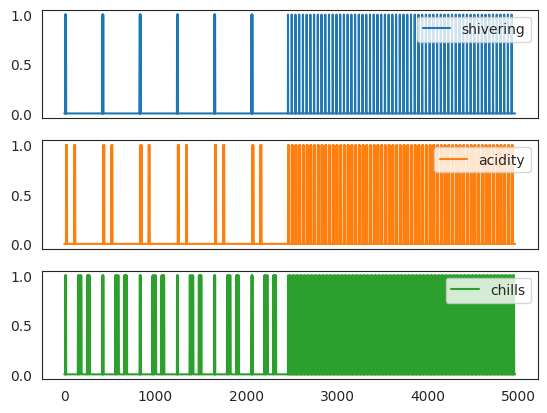

In [156]:
data1 = dataset.loc[:,["shivering", "acidity", "chills"]]
data1.plot(subplots=True)

In [157]:
dataset.isnull()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,red_sore_around_nose,yellow_crust_ooze,allergic_lifestyle,unhealthy_eating_habits,poor_nutrition,insufficient_sleep,less_frequent_physical_exercise,highly_frequent_physical_exercise,stressful_lifestyle,prognosis
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4957,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [158]:
dataset.isnull().sum()

itching                              0
skin_rash                            0
nodal_skin_eruptions                 0
continuous_sneezing                  0
shivering                            0
                                    ..
insufficient_sleep                   0
less_frequent_physical_exercise      0
highly_frequent_physical_exercise    0
stressful_lifestyle                  0
prognosis                            0
Length: 140, dtype: int64

In [159]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,red_sore_around_nose,yellow_crust_ooze,allergic_lifestyle,unhealthy_eating_habits,poor_nutrition,insufficient_sleep,less_frequent_physical_exercise,highly_frequent_physical_exercise,stressful_lifestyle,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,(vertigo) Paroymsal Positional Vertigo
4957,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,Acne
4958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4959,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,Psoriasis


In [160]:
train_X, test_X = train_data.iloc[:, :-1], test_data.iloc[:, :-1]
train_y, test_y = train_data.iloc[:, -1], test_data.iloc[:, -1]

In [165]:
X, y = dataset.iloc[:,:-1], dataset.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.97)

# Random Forest Classifier

In [166]:
# Importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Creating a Gaussian Classifier
rf_clf = RandomForestClassifier(n_estimators=100)

# Training the model
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

In [167]:
rf_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy = {rf_accuracy*100} %")

Accuracy = 97.4859754830667 %


In [168]:
y_pred_probabilities = rf_clf.predict_proba(X_test)
predicted_classes = rf_clf.classes_
for i in range(5):
    print(f"Sample {i + 1}:")
    for class_label, probability in zip(predicted_classes, y_pred_probabilities[i]):
        print(f"Class: {class_label}, Probability: {probability}")
    print("\n")

Sample 1:
Class: (vertigo) Paroymsal  Positional Vertigo, Probability: 0.0
Class: AIDS, Probability: 0.01
Class: Acne, Probability: 0.02
Class: Alcoholic hepatitis, Probability: 0.0
Class: Allergy, Probability: 0.0
Class: Arthritis, Probability: 0.0
Class: Bronchial Asthma, Probability: 0.01
Class: Cervical spondylosis, Probability: 0.0
Class: Chicken pox, Probability: 0.01
Class: Chronic cholestasis, Probability: 0.0
Class: Common Cold, Probability: 0.0
Class: Dengue, Probability: 0.0
Class: Diabetes , Probability: 0.74
Class: Dimorphic hemmorhoids(piles), Probability: 0.0
Class: Drug Reaction, Probability: 0.0
Class: Fungal infection, Probability: 0.0
Class: GERD, Probability: 0.0
Class: Gastroenteritis, Probability: 0.0
Class: Heart attack, Probability: 0.0
Class: Hepatitis B, Probability: 0.01
Class: Hepatitis C, Probability: 0.0
Class: Hepatitis D, Probability: 0.0
Class: Hepatitis E, Probability: 0.0
Class: Hypertension , Probability: 0.01
Class: Hyperthyroidism, Probability: 0.0

In [80]:
custom_data = test_data[test_data['prognosis'] == 'Hepatitis E'].sample()
custom_data_array = np.array(custom_data)
custom_data_array = custom_data_array[0]
custom_data_array = custom_data_array[:-1]

In [81]:
custom_data = [random.choice([0, 1]) for _ in range(len(column_list))]
custom_data.pop()
custom_data_array = np.array(custom_data)

In [82]:
train_data.head(1)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [83]:
custom_data_array

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [84]:
# custom_data_reshaped = custom_data_array.reshape(1, -1)
samp = X_test.sample()
print(samp)
rf_clf.predict(samp)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
2809        0          0                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
2809          0       0           0             0        0                 0   

      ...  blister  red_sore_around_nose  yellow_crust_ooze  \
2809  ...        0                     0                  0   

      Allergic lifestyle  Unhealthy eating habits  Poor nutrition  \
2809                   0                        1               1   

      Insufficient sleep  Less frequent physical exercise  \
2809                   0                                0   

      Highly frequent physical exercise  Stressful Lifestyle  
2809                                  0                    0  

[1 rows x 139 columns]


array(['Hepatitis C'], dtype=object)

In [85]:
feature_imp = pd.Series(rf_clf.feature_importances_, index=list(dataset.columns[:-1])).sort_values(ascending=False).head(15)
print(feature_imp[::-1])
print(feature_imp[::-1].sum())
print(feature_imp[::-1].index)

yellowing_of_eyes                    0.012074
mild_fever                           0.012227
Insufficient sleep                   0.012640
itching                              0.012701
sweating                             0.013182
spotting_ urination                  0.013667
Allergic lifestyle                   0.013798
fatigue                              0.013873
Unhealthy eating habits              0.013876
chest_pain                           0.013930
Highly frequent physical exercise    0.014095
lack_of_concentration                0.014195
Poor nutrition                       0.014324
muscle_pain                          0.014637
family_history                       0.015804
dtype: float64
0.20502296572688297
Index(['yellowing_of_eyes', 'mild_fever', 'Insufficient sleep', 'itching',
       'sweating', 'spotting_ urination', 'Allergic lifestyle', 'fatigue',
       'Unhealthy eating habits', 'chest_pain',
       'Highly frequent physical exercise', 'lack_of_concentration',
       '

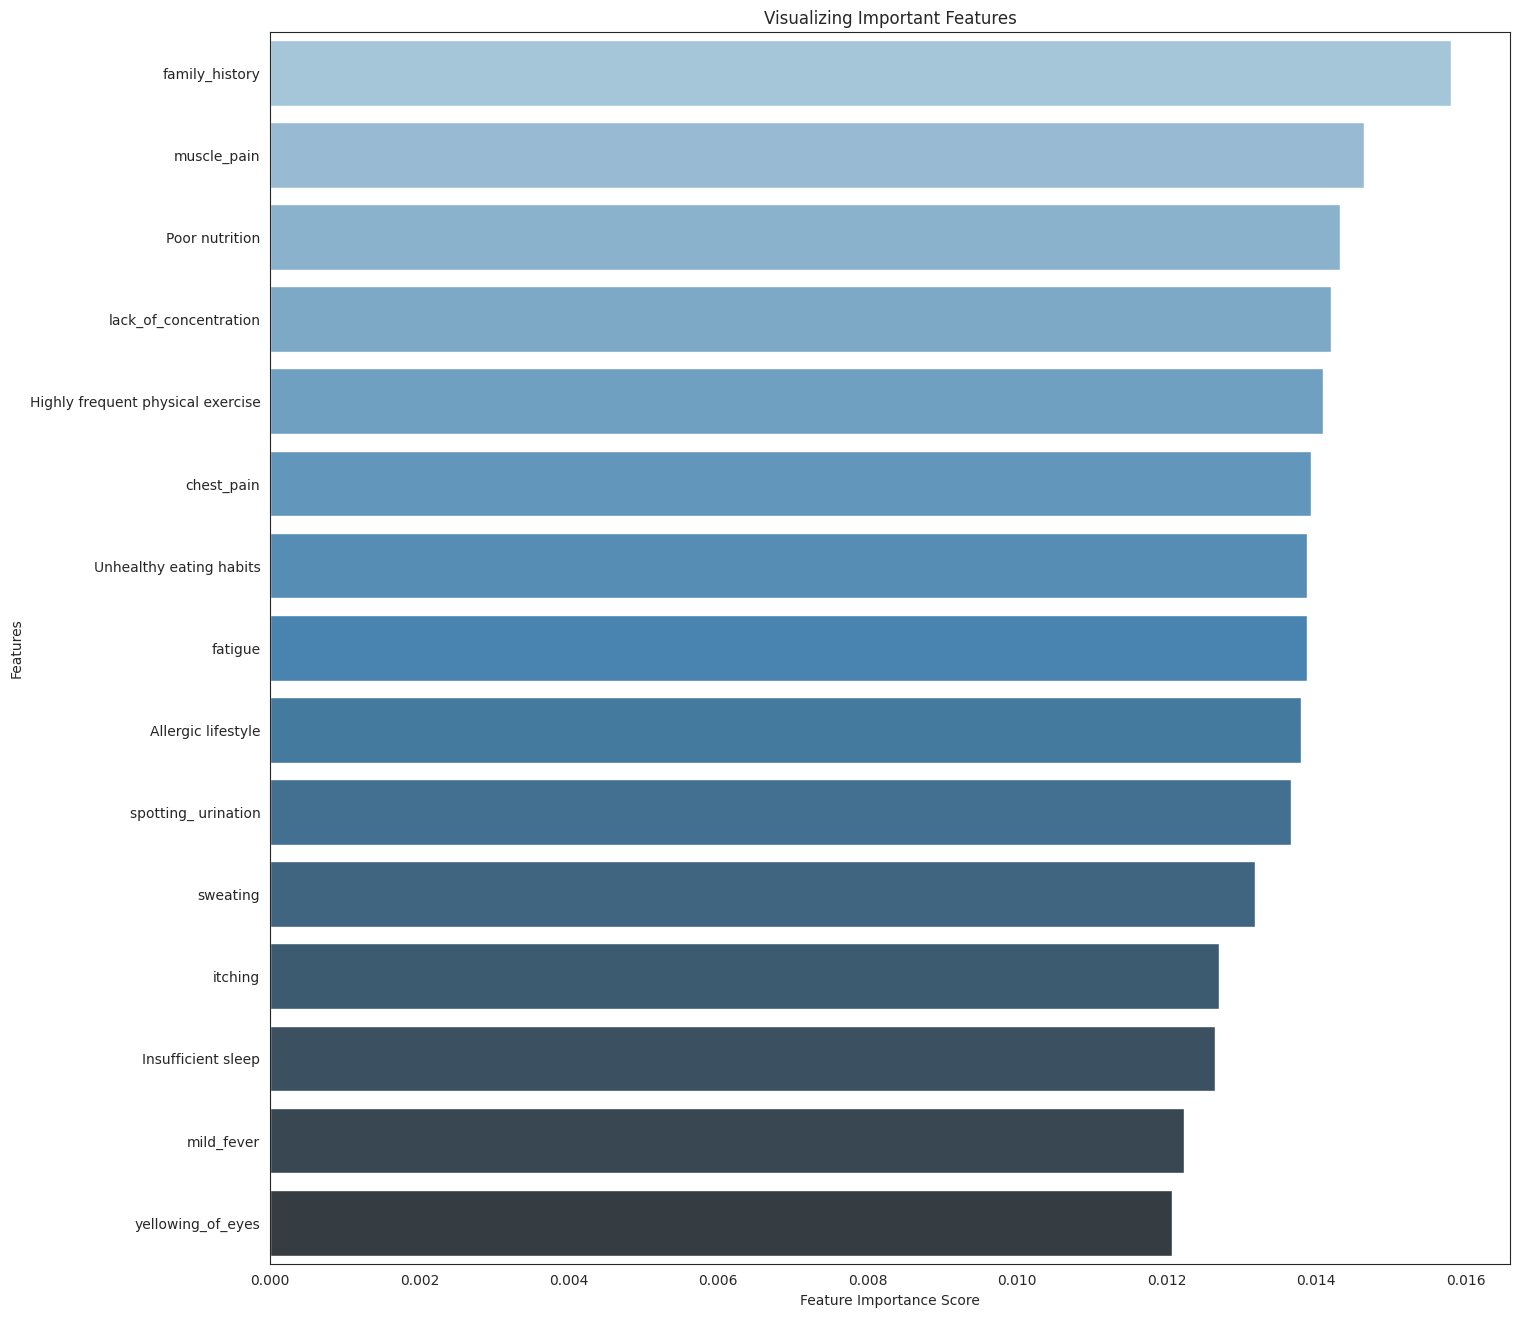

In [86]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
sb.set_style("white")
sb.barplot(x=feature_imp, y=feature_imp.index, palette='Blues_d', color='white')

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [87]:
limited_X, y = dataset[['receiving_blood_transfusion', 'red_sore_around_nose',
       'abnormal_menstruation', 'continuous_sneezing', 'breathlessness',
       'blackheads', 'shivering', 'dizziness', 'back_pain', 'unsteadiness',
       'yellow_crust_ooze', 'muscle_weakness', 'loss_of_balance', 'chills',
       'ulcers_on_tongue', 'stomach_bleeding', 'lack_of_concentration', 'coma',
       'neck_pain', 'weakness_of_one_body_side', 'diarrhoea',
       'receiving_unsterile_injections', 'headache', 'family_history',
       'fast_heart_rate', 'pain_behind_the_eyes', 'sweating', 'mucoid_sputum',
       'spotting_ urination', 'sunken_eyes', 'dischromic _patches', 'nausea',
       'dehydration', 'loss_of_appetite', 'abdominal_pain', 'stomach_pain',
       'yellowish_skin', 'altered_sensorium', 'chest_pain', 'muscle_wasting',
       'vomiting', 'mild_fever', 'high_fever', 'red_spots_over_body',
       'dark_urine', 'itching', 'yellowing_of_eyes', 'fatigue', 'joint_pain',
       'muscle_pain']], dataset.iloc[:,-1]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(limited_X, y, test_size=0.3) # 70% training and 30% test

In [88]:
limited_X.head(3)

,receiving_blood_transfusion,red_sore_around_nose,abnormal_menstruation,continuous_sneezing,breathlessness,blackheads,shivering,dizziness,back_pain,unsteadiness,...,vomiting,mild_fever,high_fever,red_spots_over_body,dark_urine,itching,yellowing_of_eyes,fatigue,joint_pain,muscle_pain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [89]:
rf_clf2 = RandomForestClassifier(n_estimators=100)
rf_clf2.fit(X_train,y_train)

y_pred = rf_clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.938885157824043


In [90]:
feature_imp2 = pd.Series(rf_clf2.feature_importances_,index=list(limited_X.columns)).sort_values(ascending=False).head(20)
feature_imp2[::-1]

chills                   0.022199
dischromic _patches      0.022307
blackheads               0.022415
yellowing_of_eyes        0.023021
abnormal_menstruation    0.023463
vomiting                 0.024953
itching                  0.025374
yellowish_skin           0.025465
muscle_pain              0.025950
sweating                 0.026625
loss_of_appetite         0.028115
neck_pain                0.028235
abdominal_pain           0.028921
chest_pain               0.029001
nausea                   0.029276
muscle_weakness          0.030975
joint_pain               0.032238
headache                 0.034467
high_fever               0.034808
fatigue                  0.052460
dtype: float64

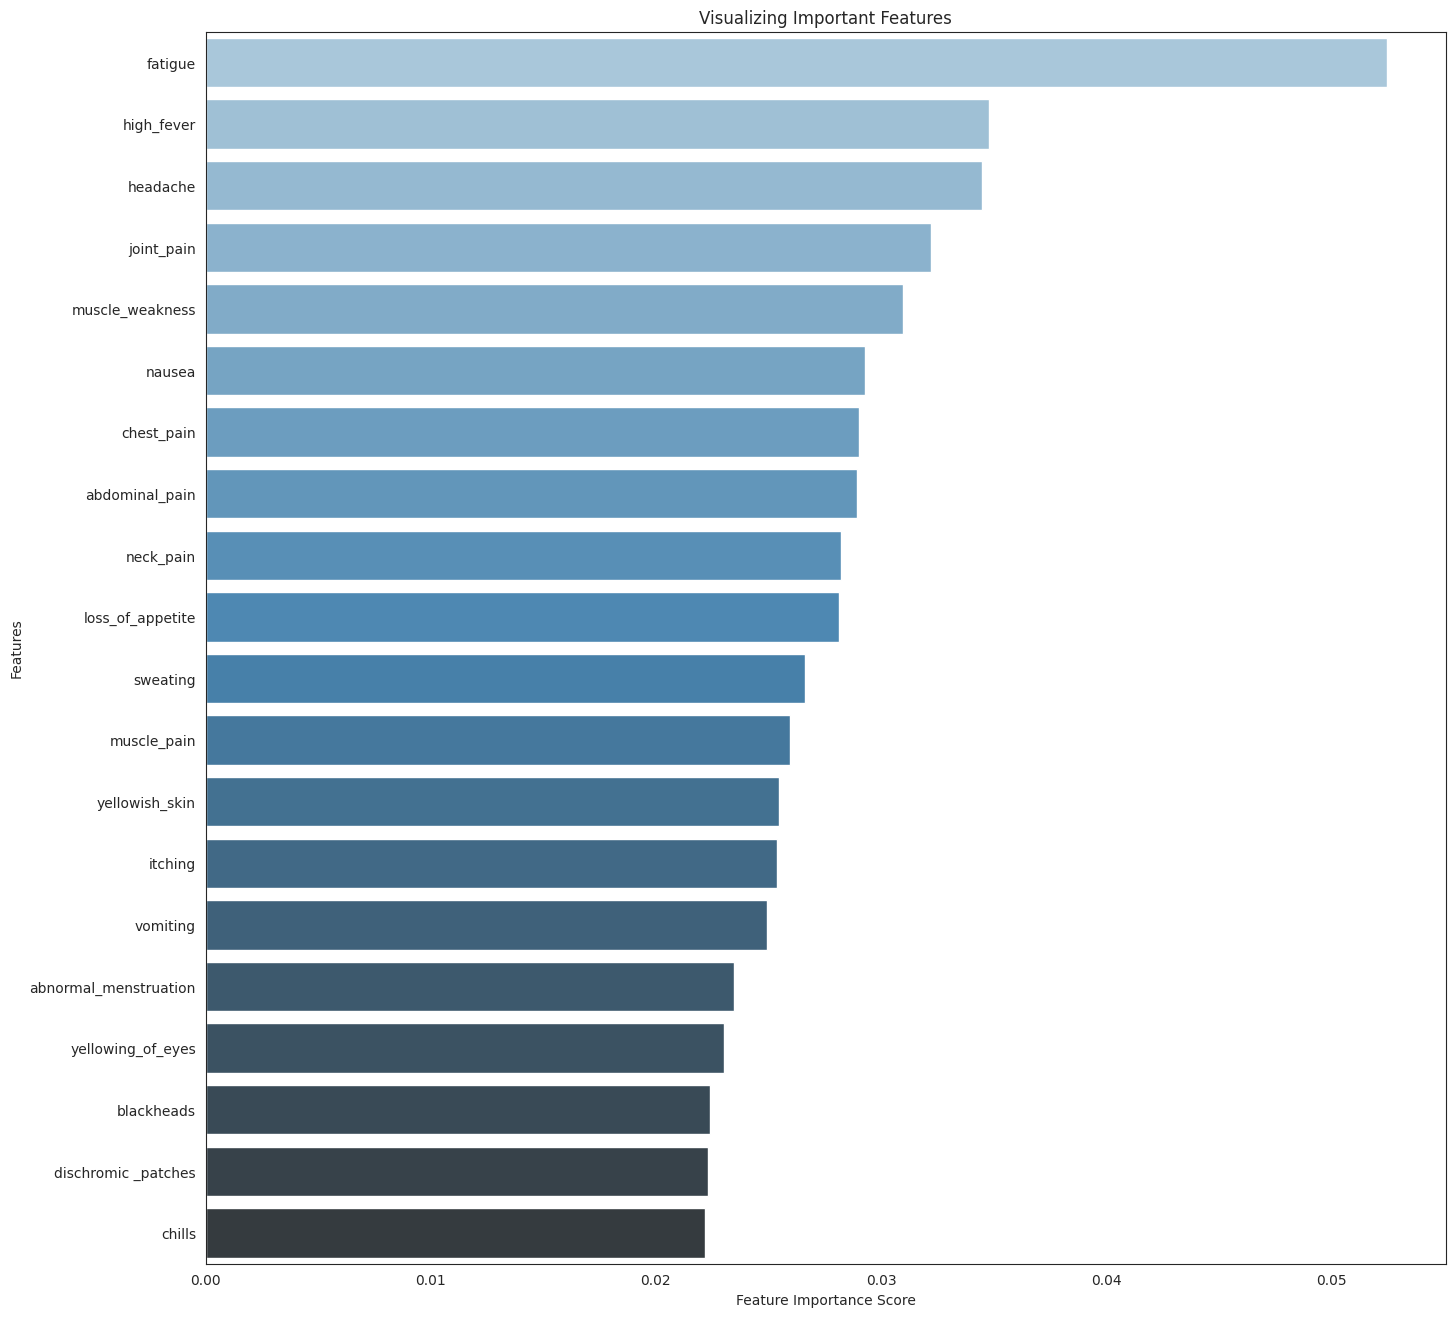

In [91]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

sb.set_style("white")
sb.barplot(x=feature_imp2, y=feature_imp2.index, palette='Blues_d',color='white')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [92]:
dataset['prognosis'].value_counts(normalize = True)

Fungal infection                           0.02439
Hepatitis C                                0.02439
Hepatitis E                                0.02439
Alcoholic hepatitis                        0.02439
Tuberculosis                               0.02439
Common Cold                                0.02439
Pneumonia                                  0.02439
Dimorphic hemmorhoids(piles)               0.02439
Heart attack                               0.02439
Varicose veins                             0.02439
Hypothyroidism                             0.02439
Hyperthyroidism                            0.02439
Hypoglycemia                               0.02439
Osteoarthristis                            0.02439
Arthritis                                  0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Acne                                       0.02439
Urinary tract infection                    0.02439
Psoriasis                                  0.02439
Hepatitis D                    

<Axes: >

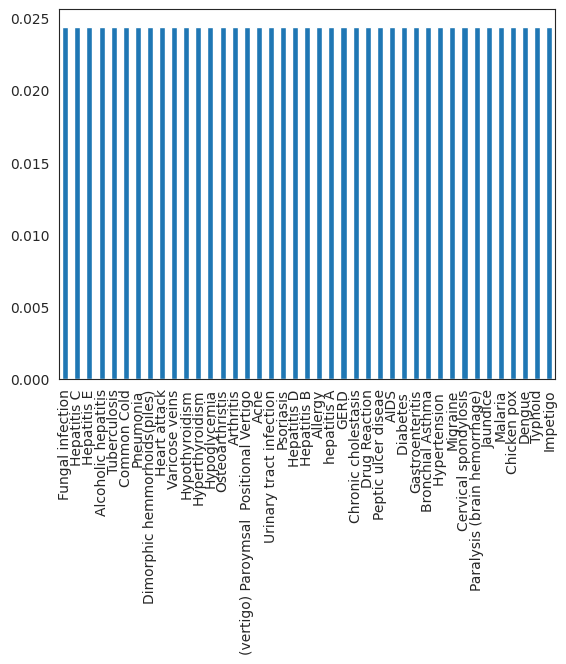

In [93]:
dataset['prognosis'].value_counts(normalize = True).plot.bar()

In [94]:
set(column_list)

{'abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic _patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'fluid_overload.1',
 'foul_smell_of urine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itch

In [ ]:
'''
Lifestyles -
unhealthy eating habits - abdominal pain, acidity, burning micturition, constipation, indigestion, nausea, vomiting
poor nutrition - abnormal menstruation, brittle nails, dry and tingling lips, excessive hunger, fast heart rate, fatigue, hair loss, irregular sugar level, obesity, dry skin, skin_rash, weakness
improper sleep cycle, insufficient sleep - altered_sensorium, dizziness, lack_of_concentration, lethargy, mood_swings, movement_stiffness, restlessness, runny_nose, sinus_pressure, slurred_speech, sunken_eyes, unsteadiness, visual_disturbances
less frequent physical exercise - Altered sensorium, Coma, Depression, Obesity, back pain, neck pain, lethargy, weight gain, constipation
highly frequent physical exercise - Joint pain, Muscle pain, Weight loss
stressful lifestyle - Anxiety, Depression, Irritability, Lack of concentration, Restlessness, altered sensorium, coma, insomnia
alergic lifestyle - Continuous sneezing, Runny nose, Itching, Redness of eyes, Skin rash, itching, Watery eyes, cough, breathlessness, Sinus pressure, Dizziness, Congestion, Itching, Skin rash, Redness of eyes, Skin peeling
'''

# Linear Regression Classifier

In [91]:
# Import Linear Regression Classifier
from sklearn.linear_model import LinearRegression

# Creating linear regression classifier
linear_clf = LinearRegression()

In [92]:
# Label encoding the prognosis
label_encoder = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_prognosis)
test_labels_encoded = label_encoder.fit_transform(test_prognosis)

In [93]:
linear_clf.fit(train_X, train_labels_encoded)

y_pred = linear_clf.predict(test_X)

In [94]:
y_pred_rounded = [round(value) for value in y_pred]

In [95]:
linear_accuracy = metrics.accuracy_score(test_labels_encoded, y_pred_rounded)
print(f"Accuracy = {linear_accuracy*100} %")

Accuracy = 53.65853658536586 %
